# Biomolecular Interactions

## Practical session P02 - Docking with PyDock

### Introduction

Protein-protein interactions lie at the heart of cellular control mechanisms. Protein molecules in the cell interact either permanently or transiently. Many types of chemical interactions are involved in a protein-protein complex; knowing this interaction can help us understand how many biochemical processes involving these proteins are regulated.

In this practice session, we will employ the docking software LightDock. We will follow some easy installation steps (found on the P02 GitHub repository page) and use them to dock two protein partners.  We will repeat the docking procedure using experimental information about which residues pertain to the protein-protein complex interface. While the docking commands will be run using the terminal, we will load the notebook's output files to analyze the docking results.

If, in any case, the installation does not work, you can run the docking calculations directly on the LightDock server.

### A docking test (Pal/Tol) system

The Pal/Tol system plays a role in outer membrane invagination during cell division and is important for maintaining outer membrane integrity. We are going to use the two protein partners from E.coli in order to see the behaviour of the docking method. Most of the docking runs will take longer than the time we have for this practical session, therefore, we just show you how to run this calculations and provide the output for longer runs inside this repository. The input files can be found in the "input" directory, and previous output runs are in folder, which will later be indicated.


### Using the LightDock server:

The [LightDock Server](https://server.lightdock.org/) is web based service that can help you run basic docking calculations easily. You just need to provide the input files and some experimental restraints options. 

Our biggest protein will be the receptor and the smaller one, will be the ligand. Especifically:

```
The TolB protein, 1C5K_A.pdb, is the receptor

and

The Pal protein, 1OAP_B.pdb, is the ligand
```

We can also find a couple of fasta files inside that correspond to the full protein sequences. 

In order to define restraints for our system we need to check the available experimental information. This can come in many ways, but mainly from mutational analysis. We can read the following lines extracted from a scientific publication:

#### Experimental data

Experimental data available from:

Ray MC, Germon P, Vianney A, Portalier R, Lazzaroni JC: Identification by genetic suppression of Escherichia coli TolB residues important for TolB-Pal interaction. J Bacteriol 2000; 182: 821-824.

“(...)

The Tol-Pal system of Escherichia coli is involved in maintaining outer membrane stability acting as a barrier to the entry of macromolecules into the bacteria, thus providing protection against deleterious actions of bacteriocins and digestive enzymes. The periplasmic protein TolB was shown to interact with the outer membrane, peptidoglycan-associated proteins OmpA, Lpp, and Pal (4, 7). Thus, TolB and Pal could be part of a multicomponent system linking the outer membrane to peptidoglycan. The aim of this study was to determine the regions of TolB involved in the interaction of the protein with Pal. To this end, we used suppressor genetic techniques which had previously allowed us to characterize the regions of interaction between TolQ, TolR, and TolA (10, 18). pal point mutations were identified, and some of them involved residues important for interaction with TolB (7). These mutations induce sensitivity to sodium cholate and release of periplasmic proteins in the medium. We used these pal mutants to search for suppressors in tolB.

(...)

Isolation of extragenic suppressor mutations of pal A88V in tolB. Twelve mutations affecting 11 different residues of tolB were isolated as suppressor mutations of pal A88V (Table 2). They enabled the pal A88V mutant to grow on plates containing sodium cholate and lowered its excretion of periplasmic enzymes, some mutants being more efficient than others in suppressing the pal A88V phenotype. In most cases, the tolB mutations could not suppress the phenotypes of tolerance to colicins A and E2 of mutant pal A88V. Three tolB point mutations (H246Y, A249V, and T292I) affected the activity of TolB, whereas the others had phenotypes similar to the wild type. All the extragenic suppressor mutations of pal A88V are located in the C-terminal region of TolB. This suggests that this region of TolB is important for its interaction with Pal.

(...)

Isolation of intragenic suppressor mutations of pal A88V. Mutations pal S99F and pal E102K were both isolated as intragenic suppressor mutations of pal A88V. The pal E102K mutations was previously described as a pal-defective mutant (7). Both pal S99F and pal E102K mutations enabled the pal A88V mutant to grow in the presence of sodium cholate and lowered its excretion of periplasmic enzymes, mutant pal E102K being more efficient than mutant pal S99F as a suppressor mutation (Table 1). Thus, the conformation of the region from residues 88 to 102 appeared to be important for Pal function.

(...)”


#### Restraints

If we use chimera to align the full protein sequences to the PDB sequences then we can assign numbers to this mutated positions:


* 1C5K_A | TolB
```
H212, A215, T258
```

* 1C5K_A | Pal
```
S35, K37
```

We can employ all or some of this restraints in the web server to make the calculation.

### LightDock Setup (from the command line)

We start by creating a folder called "docking":

```
mkdir docking
```

We enter this folder to execute the program:

```
cd docking
```

Now we can run the LightDock setup script using the following line:

```
lightdock3_setup.py ../input/1C5K_A.pdb ../input/1OAP_B.pdb 10 100 --noxt
```

The first argument is the script that prepares the setup, then the next arguments are:

    * ../input/1C5K_A.pdb, The input pdb for the receptor
    * ../input/1OAP_B.pdb, The input pdb for the ligand
    * 10, The number of swarms
    * 100, The number of glowworms
    * --noxt, Ignore OXT (terminal oxygen) atoms. 
    
After the command has finished executing, we can visualize the setup with chimera; you need to execute the following line:

```
chimera ../input/lightdock_1C5K_A.pdb init/cluster_centers.pdb init/starting_positions_0.pdb
```

We observe the positions of the clusters as points around the receptor molecule. These points represent the swarms' positions from where the algorithms will position the glowworms. We can also observe that one of these cluster positions is populated by 200 glowworms. 

For details in the files and directories created, please review the following link:

[LightDock Basics](https://lightdock.org/tutorials/basics)


### Run lightdock

After the setup is done, we can run the algorithm for a defined (10) number of steps by executing:

```
lightdock3.py setup.json 10
```

Here, lightdock3.py is the script we use to run the algorithm, and the number 10, is the number of optimization steps that the algorithm will follow.

 After the run is finished, we can visualize results using the following code:
 
 
#### Import needed libraries

In [1]:
import os
import numpy as np
import pandas
import matplotlib.pyplot as plt
import mdtraj as md

In [2]:
# Define the plots' resolutions.
plt.rcParams["figure.dpi"] = 100

#### Define functions for the analysis

In [3]:
def readDockingScores(folder, cycle=100):
    
    scores = {}

    for s in os.listdir(folder):
        if s.startswith('swarm_'):
            index = int(s.split('_')[1])
            scores[index] = []
            for f in os.listdir(folder+'/'+s):
                if f.startswith('gso_'):
                    cycle_file = int(f.split('_')[-1].split('.')[0])
                    if cycle_file == cycle:
                        with open(folder+'/'+s+'/'+f) as output:
                            for i,l in enumerate(output):
                                if i > 0:
                                    score = float(l.split()[-1])
                                    scores[index].append(score)
            scores[index] = np.array(scores[index])

    scores = pandas.DataFrame({i:scores[i] for i in sorted(scores)})
    
    return scores

In [4]:
def generateModels(input_receptor, input_ligand, swarm_index, glowworms=200, cycles=100):
    
    command = 'lgd_generate_conformations.py '
    command += input_receptor+' '
    command += input_ligand+' '
    command += folder+'/swarm_'+str(swarm_index)+'/gso_'+str(cycles)+'.out '
    command += str(glowworms)
    os.system(command)
    
    models = {}
    
    for pdb in os.listdir(folder+'/swarm_'+str(swarm_index)):
        if pdb.endswith('.pdb'):
            gw_index = int(pdb.split('_')[-1].split('.')[0])
            models[gw_index] = folder+'/swarm_'+str(swarm_index)+'/'+pdb
            
    return models

In [5]:
def calculateRMSD(native_traj, model_path):
    
    native = native_traj
    docked = md.load(model_path)
    
    # Save CA indexes of native pdb
    native_CA_atoms = []
    for chain in native.topology.chains:
        for residue in chain.residues:
            for atom in residue.atoms:
                if atom.name == 'CA':
                    native_CA_atoms.append(atom.index)
                    
    # Save CA indexes of docked pdb
    docking_CA_atoms = []
    for chain in docked.topology.chains:
        for i,residue in enumerate(chain.residues):
            if chain.index == 1 and i in [0,1]:
                continue
            else:
                for atom in residue.atoms:
                    if atom.name == 'CA':
                        docking_CA_atoms.append(atom.index)
                        
    # Slice the trajectories to get only alpha carbon atoms
    native_ca = native.atom_slice(native_CA_atoms)
    docked_ca = docked.atom_slice(docking_CA_atoms)

    # Superimpose docked structure to the native
    docked_ca = docked_ca.superpose(native_ca)

    # Calculate RMSD between the structures
    rmsd = md.rmsd(native_ca, docked_ca)[0]*10 # Convert to angstroms
    
    return rmsd

In [6]:
def removeModels(swarm_index):
    
    for f in os.listdir(folder+'/swarm_'+str(swarm_index)):
        if f.endswith('.pdb'):
            os.remove(folder+'/swarm_'+str(swarm_index)+'/'+f)
    

In [7]:
def getRMSDsForDocking(folder, native, swarms=50, glowworms=200, overwrite=False):
    
    
    if not os.path.exists(folder+'_rmsd.csv') or overwrite:
        
        native = md.load(native)

        rmsd = {}
        for swarm_index in range(swarms):
            
            removeModels(swarm_index)
    
            rmsd[swarm_index] = []

            models = generateModels('input/1C5K_A.pdb', 'input/1OAP_B.pdb', swarm_index, glowworms=glowworms)

            for m in sorted(models):
                rmsd[swarm_index].append(calculateRMSD(native, models[m]))

            removeModels(swarm_index)

        for i in rmsd:
            rmsd[i] = np.array(rmsd[i])

        rmsd = pandas.DataFrame(rmsd)

        rmsd.to_csv(folder+'_rmsd.csv')
        
    else:

        df = pandas.read_csv(folder+'_rmsd.csv', index_col=0)
        
        indexes = [int(i) for i in df]
            
        rmsd = {}
        for i in sorted(indexes):
            rmsd[i] = df[str(i)]
            
        rmsd = pandas.DataFrame(rmsd)
            
    return rmsd

In [8]:
def calculateRMSDsInFolder(folder, native, debug=False):
    
    native = md.load(native)

    rmsd = {}

    for pdb in os.listdir(folder):

        if pdb.endswith('.pdb'):
            try:
                rmsd[pdb.replace('.pdb', '')] = calculateRMSD(native, folder+'/'+pdb)
            except:
                if debug:
                    rmsd[pdb.replace('.pdb', '')] = calculateRMSD(native, folder+'/'+pdb)
                else:
                    print('Problem in calculating RMSD for '+folder+'/'+pdb+' file.')
    return rmsd

In [9]:
def plotRMSDvsScores(scores, rmsd, title=None):
    
    X = []
    Y = []
    
    for i in scores:
        
        X += rmsd[i].tolist()
        Y += scores[i].tolist()
        
    plt.scatter(X, Y, s=0.5, c='r')
    plt.xlabel('RMSD to native structure [angstroms]')
    plt.ylabel('DFIRE score')
    
    if title != None:
        
        plt.title(title)

## Analyze server results using only receptor restraints

In [10]:
folder = 'docking_server'

Text(0, 0.5, 'DFIRE score')

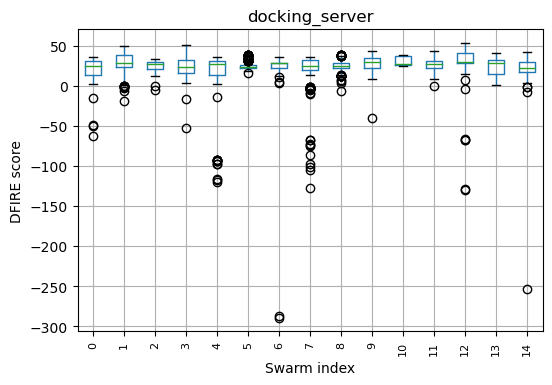

In [11]:
scores = readDockingScores(folder, cycle=100)
scores.boxplot()
plt.title(folder)
plt.xticks(rotation=90, fontsize=8)
plt.xlabel('Swarm index')
plt.ylabel('DFIRE score')

In [12]:
rmsd = getRMSDsForDocking(folder, 'native/2HQS_native.pdb', overwrite=False, swarms=15, glowworms=200)

Text(0, 0.5, 'RMSD to native structure')

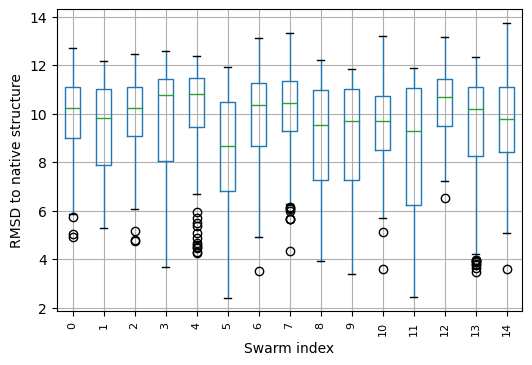

In [13]:
rmsd.boxplot()
plt.xticks(rotation=90, fontsize=8)
plt.xlabel('Swarm index')
plt.ylabel('RMSD to native structure')

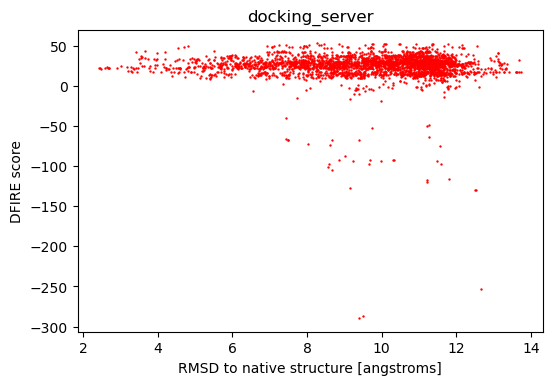

In [14]:
plotRMSDvsScores(scores, rmsd, title=folder)

In [15]:
rmsd = calculateRMSDsInFolder('docking_server/top', 'native/2HQS_native.pdb')

Problem in calculating RMSD for docking_server/top/min_top_1.pdb file.


In [16]:
for model in [(k,v) for k,v in sorted(rmsd.items(), key=lambda x:x[1])]:
    print(model)

('top_72', 2.6161587238311768)
('top_22', 3.056562840938568)
('top_84', 3.663870692253113)
('top_2', 3.881275951862335)
('fixed_top_2', 3.881275951862335)
('min_top_2', 3.9403271675109863)
('top_24', 4.346573054790497)
('top_73', 5.3620076179504395)
('top_23', 5.444167852401733)
('top_88', 5.5776965618133545)
('top_58', 5.734494924545288)
('top_18', 5.7804059982299805)
('top_91', 5.8324503898620605)
('top_63', 5.922529697418213)
('top_86', 6.233927607536316)
('top_71', 6.456546187400818)
('top_76', 6.49142324924469)
('top_62', 6.504703760147095)
('top_54', 6.5194761753082275)
('top_87', 6.561538577079773)
('top_69', 6.800088882446289)
('top_50', 6.868007183074951)
('top_61', 7.074416875839233)
('top_41', 7.688434720039368)
('top_77', 7.817816138267517)
('top_38', 7.940801978111267)
('top_98', 7.962208986282349)
('top_27', 8.024641871452332)
('top_68', 8.345993161201477)
('top_64', 8.359938859939575)
('top_30', 8.457684516906738)
('top_20', 8.46788763999939)
('top_52', 8.536643385887146

## Visualizing results with Chimera

We can grab any of these files to visualize them with Chimera:

```
chimera docking_server/top/top_2.pdb
```

In Chimera, we can select the interface between the two proteins executing:

```
:.a & :.b zr<5
```

This command tells Chimera to select all chain A residues at least 5 angstroms from chain B.

You can easily reverse this:

```
:.b & :.a zr<5
```

This other command tells Chimera to select all chain B residues that are at least 5 angstroms from chain A.

## Analyze server results using receptor and ligand restraints

In [17]:
folder = 'docking_server_ligrest'

Text(0, 0.5, 'DFIRE score')

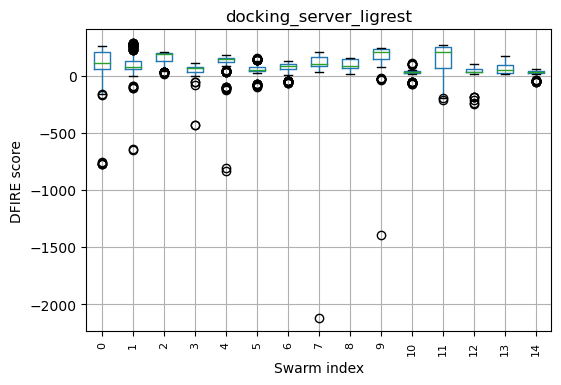

In [18]:
scores = readDockingScores(folder, cycle=100)
scores.boxplot()
plt.title(folder)
plt.xticks(rotation=90, fontsize=8)
plt.xlabel('Swarm index')
plt.ylabel('DFIRE score')

In [19]:
rmsd = getRMSDsForDocking(folder, 'native/2HQS_native.pdb', overwrite=False, swarms=15, glowworms=200)

Text(0, 0.5, 'RMSD to native structure')

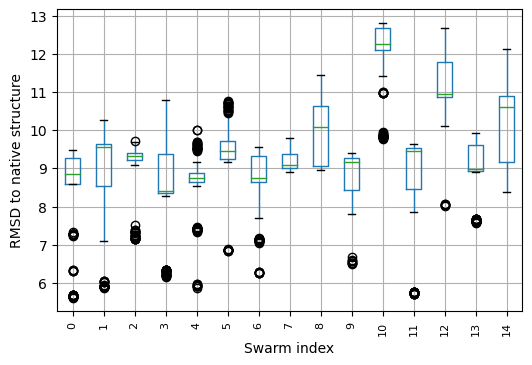

In [20]:
rmsd.boxplot()
plt.xticks(rotation=90, fontsize=8)
plt.xlabel('Swarm index')
plt.ylabel('RMSD to native structure')

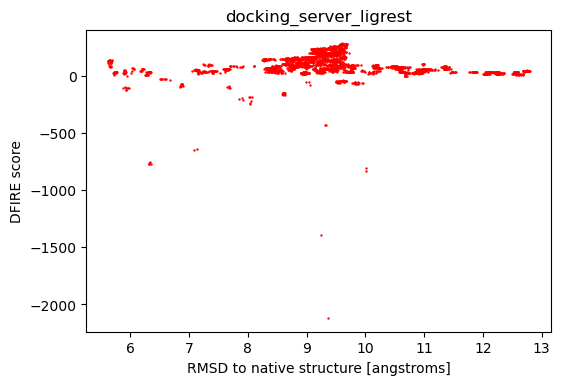

In [21]:
plotRMSDvsScores(scores, rmsd, title=folder)

## Analyze our local run without restraints

In [24]:
folder = 'docking_local'

Text(0, 0.5, 'DFIRE score')

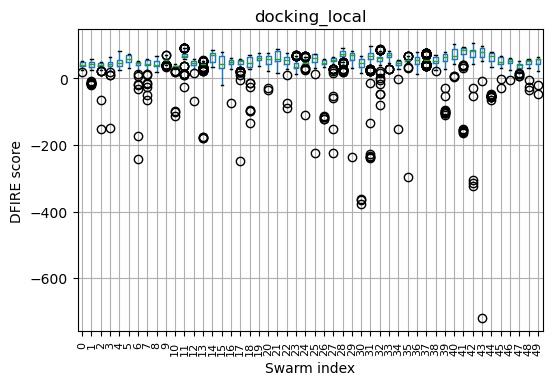

In [25]:
scores = readDockingScores(folder, cycle=100)
scores.boxplot()
plt.title(folder)
plt.xticks(rotation=90, fontsize=8)
plt.xlabel('Swarm index')
plt.ylabel('DFIRE score')

In [26]:
rmsd = getRMSDsForDocking(folder, 'native/2HQS_native.pdb', overwrite=False)

Text(0, 0.5, 'RMSD to native structure')

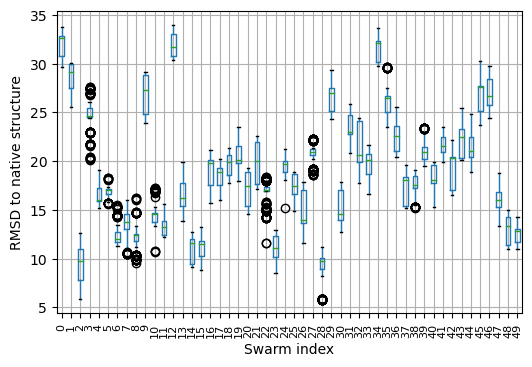

In [27]:
rmsd.boxplot()
plt.xticks(rotation=90, fontsize=8)
plt.xlabel('Swarm index')
plt.ylabel('RMSD to native structure')

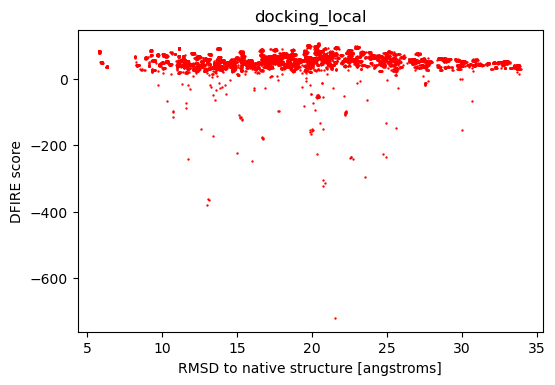

In [28]:
plotRMSDvsScores(scores, rmsd, title=folder)